In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [5]:
###Training Set###

#Read the complete DataSet
df_train=pd.read_csv('2A_Training.csv')
df_train.index.name = 'index'
print('Training Data Set:\n',df_train.head())

#Separate out training Features as a dataframe: V3-V14 starting for data for test car 2
df_xtrain = df_train.iloc[182:,2:15]
print('df_xtrain:\n',df_xtrain.head())

#convert features to a numpy array
xtrain=df_xtrain.values

#Reshape the array: no of samples x no of features
n_samples = len(df_xtrain.index)
n_features = len(df_xtrain.columns)
xtrain.reshape(n_samples,n_features)
print('xtrain: \n',xtrain)

#Separate out targets from the training set as a dataframe A3 onward
df_ytrain = df_train.iloc[182:,18:]
print('df_ytrain:\n',df_ytrain.head())

#convert targets to a numpy array
ytrain=df_ytrain.values

#Rehsape array: samples x targets
n_targets = len(df_ytrain.columns)
ytrain.reshape(n_samples,n_targets)
print('ytrain:\n',ytrain)

### Validation Data Set ###

#Read in the complete test dataset
df_test=pd.read_csv('2A_Validation.csv')
df_test.index.name='index'
print('Validation Data Set:\n',df_test.head())

#Separate out features as a dataframe V3-V14
df_xtest=df_test.iloc[:,2:15]
print('df_xtest:\n',df_xtest.head())

#convert to a numpy array
xtest=df_xtest.values

#reshape array: Samples x Features
n_testsamples = len(df_xtest.index)
xtest.reshape(n_testsamples,n_features)
print('xtest:\n',xtest)

#separate out the targets from validation dataset A3 onwards
df_ytest = df_test.iloc[:,18:]
print('df_ytest:\n',df_ytest.head())

#convert targets to a numpy array
ytest=df_ytest.values

#Rehsape array: samples x targets
ytest.reshape(n_testsamples,n_targets)
print('ytest:\n',ytest)


Training Data Set:
        V1  V2     V3   V4   V5   V6   V7   V8   V9  V10  ...  A5  A6  A7  A8  \
index                                                    ...                   
0       0   0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0   0   0   0   
1       0   0   86.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0   0   0   0   
2       0   0  176.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0   0   0   0   
3       0   0  240.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0   0   0   0   
4       0   0  240.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0   0   0   0   

       A9  A10  A11  A12  A13  A14  
index                               
0       0    0    0    0    0    0  
1       0    0    0    0    0    0  
2       0    0    0    0    0    0  
3       0    0    0    0    0    0  
4       0    0    0    0    0    0  

[5 rows x 30 columns]
df_xtrain:
            V3   V4   V5   V6   V7   V8   V9  V10  V11  V12  V13  V14  Coulombs
index                                         

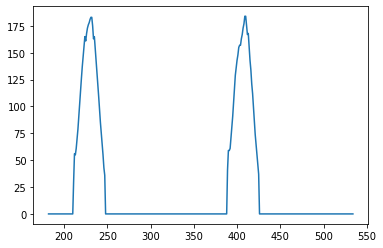

In [10]:
t=2
plt.plot(df_xtrain.index,ytrain[:,t],label='Amps_Train')
plt.show()

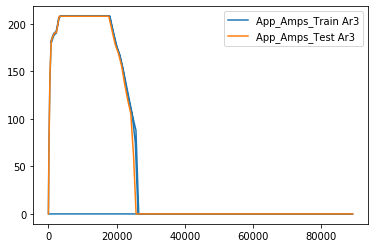

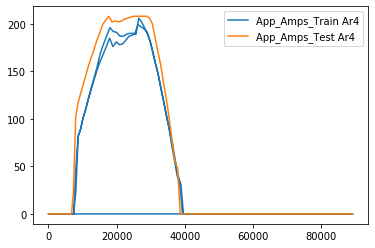

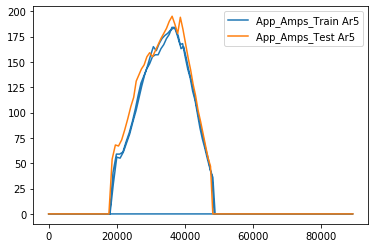

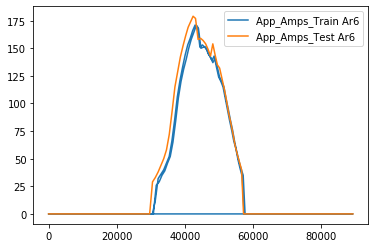

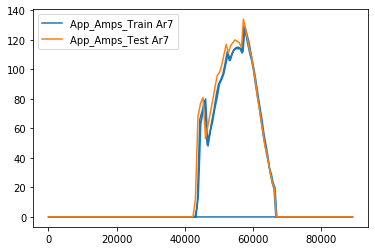

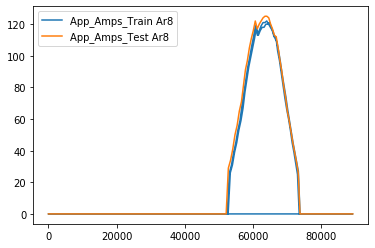

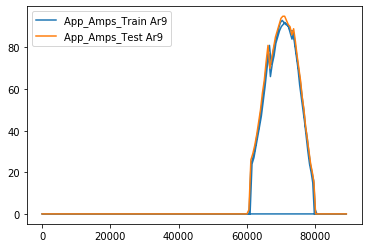

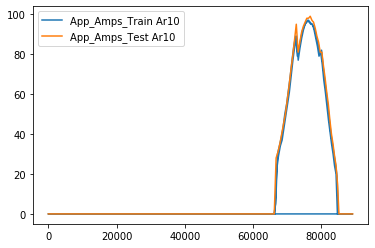

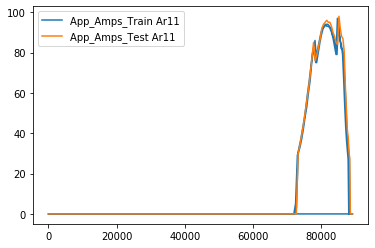

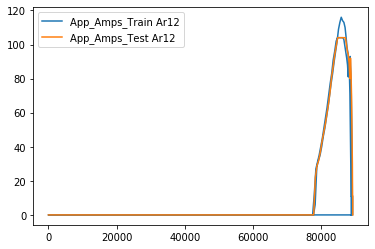

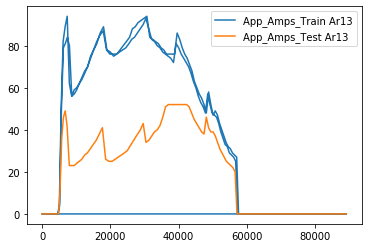

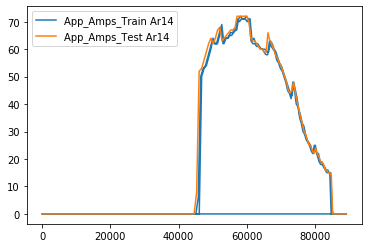

In [13]:
for i in range(n_targets):
    plt.plot(df_xtrain['Coulombs'],ytrain[:,i],label='App_Amps_Train Ar%d'% (i+3))
    plt.plot(df_xtest['Coulombs'],ytest[:,i],label='App_Amps_Test Ar%d'% (i+3))
    plt.legend()
    plt.show()

#plt.plot(df_Ytrain,df_Xtrain['V3'],label='Train')

Total error rr: 4063.4062391315383
Total error lr: 4063.4067380342312


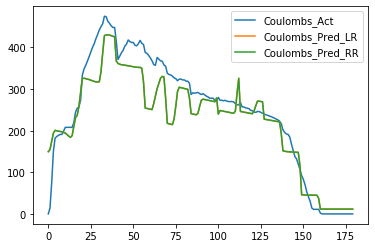

MAE: 12.336040702362393
Total error: 994.3452163514457


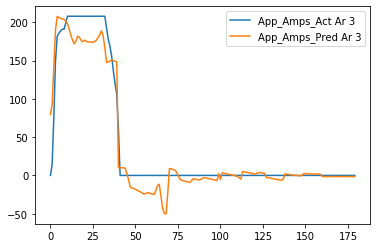

MAE: 17.006682191018875
Total error: 2253.6807806228894


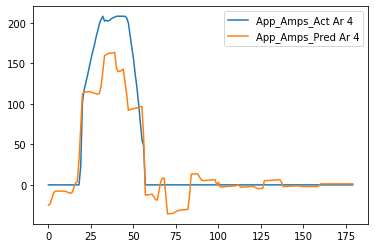

MAE: 10.091773213412855
Total error: -850.6244409933188


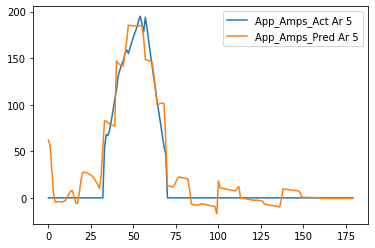

MAE: 13.359796597166923
Total error: 1583.8935470425545


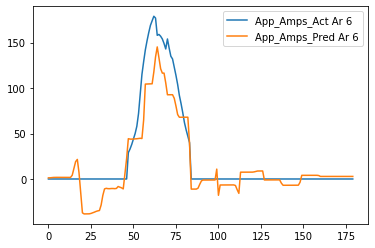

MAE: 7.103230704724604
Total error: 276.3329447132087


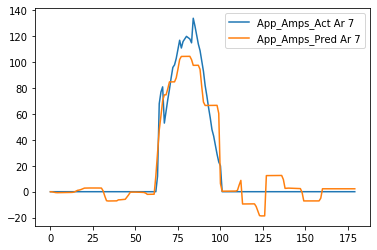

MAE: 9.307095095713215
Total error: -630.5684028555661


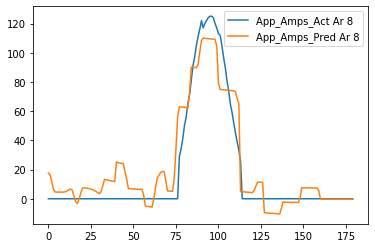

MAE: 6.6692595792577825
Total error: 216.69137549272727


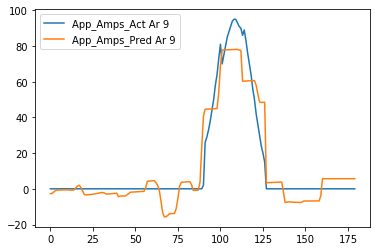

MAE: 6.1376972973947295
Total error: 150.17134209299502


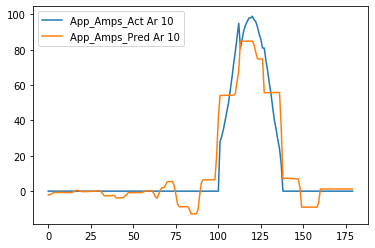

MAE: 6.2521595785730115
Total error: -91.05688463625802


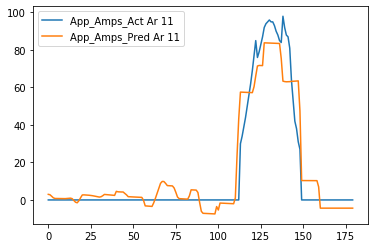

MAE: 7.568047016840708
Total error: 39.8799818991597


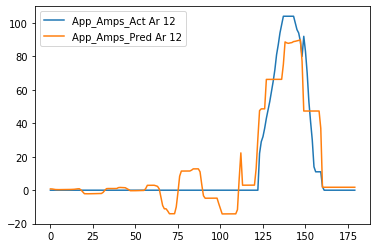

MAE: 6.861901045784023
Total error: 14.41184007798256


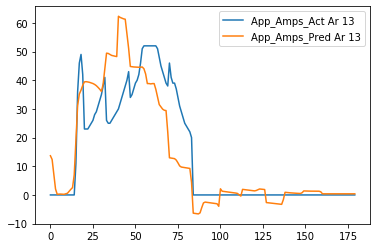

MAE: 3.7194656716116543
Total error: 106.24943822640716


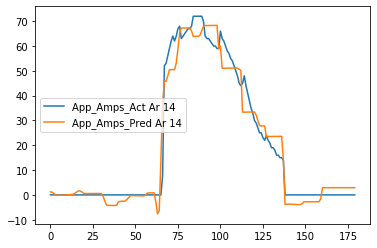

In [40]:
reg = linear_model.LinearRegression()
ridge = linear_model.Ridge(alpha=0.25)

time=range(0,n_testsamples,1)

degree=1
poly = PolynomialFeatures(degree)
xtrain_lr = poly.fit_transform(xtrain)#.make_pipeline(PolynomialFeatures(degree),reg)
model_lr = reg.fit(xtrain_lr,ytrain)

xtest_lr = poly.fit_transform(xtest)
ypred_lr = model_lr.predict(xtest_lr)

model_rr= ridge.fit(xtrain, ytrain)
ypred_rr = model_rr.predict(xtest)

ytest_columbs=ytest.sum(axis=1)
ypred_rr_columbs=ypred_rr.sum(axis=1)
ypred_lr_columbs=ypred_lr.sum(axis=1)

total_error_rr=ytest_columbs.sum() - ypred_rr_columbs.sum()
total_error_lr=ytest_columbs.sum() - ypred_lr_columbs.sum()
#r2=r2_score
print('Total error rr:',total_error_rr)
print('Total error lr:',total_error_lr)
plt.plot(time,ytest_columbs,label='Coulombs_Act')
plt.plot(time,ypred_lr_columbs,label='Coulombs_Pred_LR')
plt.plot(time,ypred_rr_columbs,label='Coulombs_Pred_RR')
plt.legend()
plt.show()

    
for i in range(n_targets):
    ground_truth = ytest[:,i]
    predict = ypred_lr[:,i]
    MAE = mean_absolute_error(ground_truth,predict)
    total_error=ground_truth.sum() - predict.sum()
    #r2=r2_score
    print('MAE:',MAE)
    print('Total error:',total_error)
    plt.plot(time,ground_truth,label='App_Amps_Act Ar %d'% (i+3))
    plt.plot(time,predict,label='App_Amps_Pred Ar %d'% (i+3))
    plt.legend()
    plt.show()

